### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

Using TensorFlow backend.


### Define the class

In [2]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
        self.alpha = alpha
        self.layers = architecture
        self.weights = [0 for i in range(len(architecture)-1)]
        self.bias = [0 for i in range(len(architecture)-1)]
        self.output = []
        if len(architecture) < 2:
            print("Error: you need at least two layers in your network")
        for i in range(len(architecture)-1):
            self.weights[i] = (np.random.randn(architecture[i], architecture[i+1]))
            self.bias[i] = (np.random.randn(architecture[i+1]))
        print("Layer architecture: ")
        for i in range(len(self.weights)):
            print("Layer", i, ": ",self.weights[i].shape)
        print("Bias: ")
        for j in range(len(self.bias)):
            print("Layer", j, ": ",self.bias[j].shape)
    
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self,X):  
        # applies the softmax function to a set of values
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        return x * (1 - x)
    
    def predict(self, inputs):
        # TODO: Define the predict function
        prediction = [0 for i in range(len(self.weights)+1)]
        prediction[0] = inputs
        for i in range(1, len(prediction)-1):
            prediction[i] = self.sigmoid(np.dot(prediction[i-1], self.weights[i-1]) + self.bias[i-1])
        prediction[-1] = self.softmax(np.dot(prediction[-2], self.weights[-1]) + self.bias[-1])
        return prediction[-1]

    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        errors = []
        for epoch in range(epochs):
            error = [0 for i in range(len(self.weights))]
            delta = [0 for i in range(len(self.weights))]
            biasDelta = [0 for i in range(len(self.bias))]
            prediction = [0 for i in range(len(self.weights)+1)]
            #forward propagation
            prediction[0] = inputs
            for i in range(1, len(prediction)-1):
                prediction[i] = self.sigmoid(np.dot(prediction[i-1], self.weights[i-1]) + self.bias[i-1])
            prediction[-1] = self.softmax(np.dot(prediction[-2], self.weights[-1]) + self.bias[-1])
            #back propagation
            error[-1] = labels - prediction[-1]
            delta[-1] = error[-1] * self.sigmoid_deriv(prediction[-1])
            errors.append(np.mean(np.abs(error[-1])))
            if(math.isnan(np.mean(np.abs(error[-1])))):
                return errors
            if epoch%displayUpdate == 0:
                print("Error in epoch(",epoch,"):", np.mean(np.abs(error[-1])))
            i = len(self.weights)-2
            while i > -1:
                error[i] = np.dot(delta[i+1], self.weights[i+1].T)
                delta[i] = error[i] * self.sigmoid_deriv(prediction[i+1])
                i-=1
            for i in range(len(self.weights)):
                biasDelta[i] = np.sum(delta[i])
                self.weights[i] += np.dot(prediction[i].T, delta[i]) * self.alpha
                self.bias[i] += biasDelta[i] * self.alpha 
        return errors

### Test datasets

#### XOR

In [3]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
# XOR_labels = np.array([[0,1,1,0]]).T

XOR_labels = np.array([
    [1,0],
    [0,1],
    [0,1],
    [1,0]
])

Layer architecture: 
Layer 0 :  (2, 2)
Layer 1 :  (2, 2)
Bias: 
Layer 0 :  (2,)
Layer 1 :  (2,)
NeuralNetwork: 2-2-2
Error in epoch( 0 ): 0.5001155504278719
Error in epoch( 100 ): 0.314385227193237
Error in epoch( 200 ): 0.29385171554636047
Error in epoch( 300 ): 0.2873886040157271
Error in epoch( 400 ): 0.2841758348226436
Error in epoch( 500 ): 0.2822431305916311
Error in epoch( 600 ): 0.28094898835727294
Error in epoch( 700 ): 0.2800203627132134
Error in epoch( 800 ): 0.27932088392323207
Error in epoch( 900 ): 0.27877469800553456
Error in epoch( 1000 ): 0.27833619054035175
Error in epoch( 1100 ): 0.2779762569105722
Error in epoch( 1200 ): 0.27767543977191367
Error in epoch( 1300 ): 0.27742023106603464
Error in epoch( 1400 ): 0.27720095599812083
Error in epoch( 1500 ): 0.27701050125364324
Error in epoch( 1600 ): 0.27684351863018736
Error in epoch( 1700 ): 0.27669590872152305
Error in epoch( 1800 ): 0.27656447601757117
Error in epoch( 1900 ): 0.2764466924502774
Error in epoch( 2000 ): 

Error in epoch( 18600 ): 0.27451109619417446
Error in epoch( 18700 ): 0.27450989323372504
Error in epoch( 18800 ): 0.2745087030249751
Error in epoch( 18900 ): 0.27450752536617196
Error in epoch( 19000 ): 0.2745063600597978
Error in epoch( 19100 ): 0.27450520691245905
Error in epoch( 19200 ): 0.27450406573477903
Error in epoch( 19300 ): 0.27450293634129463
Error in epoch( 19400 ): 0.27450181855035527
Error in epoch( 19500 ): 0.2745007121840257
Error in epoch( 19600 ): 0.2744996170679914
Error in epoch( 19700 ): 0.2744985330314669
Error in epoch( 19800 ): 0.27449745990710683
Error in epoch( 19900 ): 0.27449639753092014
Error in epoch( 20000 ): 0.2744953457421856
Error in epoch( 20100 ): 0.27449430438337186
Error in epoch( 20200 ): 0.27449327330005757
Error in epoch( 20300 ): 0.27449225234085567
Error in epoch( 20400 ): 0.27449124135733916
Error in epoch( 20500 ): 0.2744902402039688
Error in epoch( 20600 ): 0.2744892487380234
Error in epoch( 20700 ): 0.27448826681953176
Error in epoch( 20

Error in epoch( 37200 ): 0.27439840762530376
Error in epoch( 37300 ): 0.2743981049010624
Error in epoch( 37400 ): 0.27439780379220724
Error in epoch( 37500 ): 0.2743975042858404
Error in epoch( 37600 ): 0.27439720636920134
Error in epoch( 37700 ): 0.2743969100296646
Error in epoch( 37800 ): 0.27439661525473785
Error in epoch( 37900 ): 0.27439632203206066
Error in epoch( 38000 ): 0.2743960303494021
Error in epoch( 38100 ): 0.27439574019465984
Error in epoch( 38200 ): 0.2743954515558577
Error in epoch( 38300 ): 0.27439516442114464
Error in epoch( 38400 ): 0.2743948787787926
Error in epoch( 38500 ): 0.2743945946171953
Error in epoch( 38600 ): 0.2743943119248665
Error in epoch( 38700 ): 0.2743940306904382
Error in epoch( 38800 ): 0.2743937509026598
Error in epoch( 38900 ): 0.27439347255039603
Error in epoch( 39000 ): 0.2743931956226255
Error in epoch( 39100 ): 0.27439292010843946
Error in epoch( 39200 ): 0.27439264599704016
Error in epoch( 39300 ): 0.2743923732777399
Error in epoch( 39400 

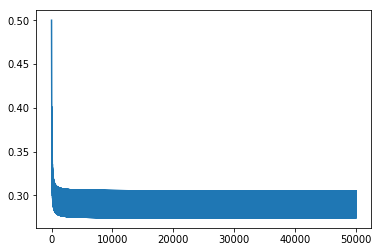

In [4]:
#TODO: Test the class with the XOR data
network = NeuralNetwork([2,2,2],4)
print(network)
errors = network.train(XOR_inputs, XOR_labels,50000)
plt.plot(errors)
# a.evaluate(XOR_inputs, XOR_labels)

#### Multiple classes

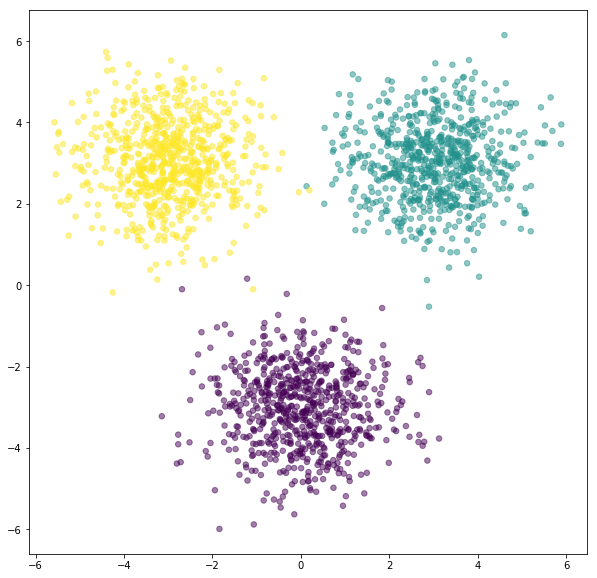

In [5]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Layer architecture: 
Layer 0 :  (2, 3)
Layer 1 :  (3, 3)
Bias: 
Layer 0 :  (3,)
Layer 1 :  (3,)
Error in epoch( 0 ): 0.5115248806340102
Error in epoch( 100 ): 0.38926918329083954


/anaconda3/envs/dl-vision-test/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


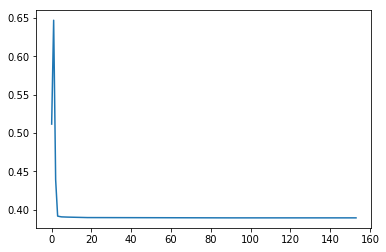

In [6]:
#TODO: Test the class with the multiple classes data
network = NeuralNetwork([2,3,3],0.2)
errors = network.train(feature_set, one_hot_labels, 600)
plt.plot(errors)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

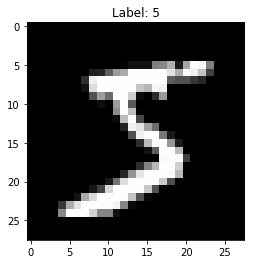

In [7]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [8]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [ ]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.
network = NeuralNetwork([784,64,32, 10], 0.1)
errors = network.train(train_images, train_labels, 1000)
plt.plot(errors)

Layer architecture: 
Layer 0 :  (784, 64)
Layer 1 :  (64, 32)
Layer 2 :  (32, 10)
Bias: 
Layer 0 :  (64,)
Layer 1 :  (32,)
Layer 2 :  (10,)
Error in epoch( 0 ): 0.17380370903479456


In [16]:
predictedLabels = network.predict(test_images)
misslabeled = []
for i in range(len(test_labels)):
    if test_labels[i] == predictedLabels[i]:
        misslabeled.append([test_images[i], test_labels[i], predictedLabels[i]])
        

/anaconda3/envs/dl-vision-test/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/envs/dl-vision-test/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
2. **What could you try doing to improve the classification accuracy?**
